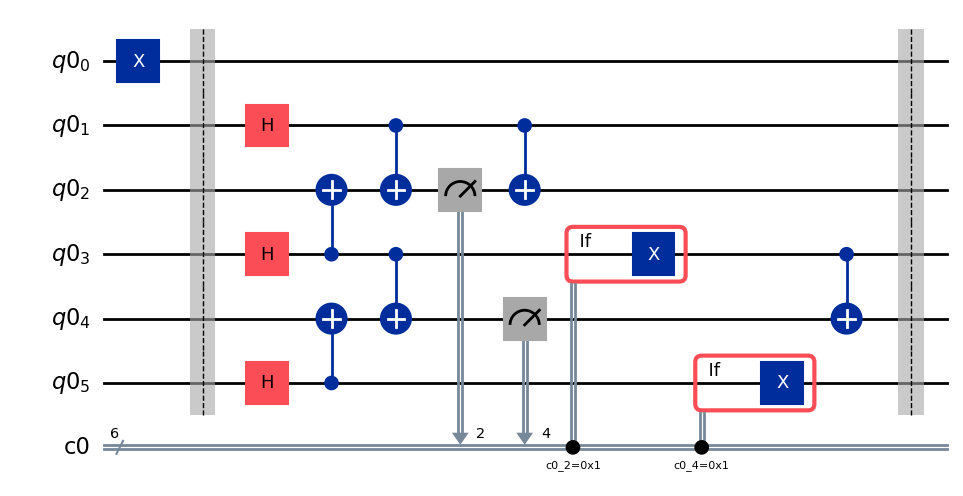

In [1]:
from qiskit import *
qubits = QuantumRegister(6)
clbits = ClassicalRegister(6)
circuit = QuantumCircuit(qubits, clbits)
 
q0, q1, q2, q3, q4, q5 = qubits
c0, c1, c2, c3, c4, c5 = clbits
circuit.x(q0)
circuit.barrier()
circuit.h([q1, q3, q5])
circuit.cx(q3,q2)
circuit.cx(q1,q2)
circuit.cx(q5,q4)
circuit.cx(q3,q4)
 
circuit.measure([q2,q4], [c2,c4])
#circuit.measure(q3,c3)
with circuit.if_test((c2, 1)):
        circuit.x(q3)
with circuit.if_test((c4, 1)):
        circuit.x(q5)
circuit.cx(q1,q2)
circuit.cx(q3,q4)
circuit.barrier()
circuit.draw('mpl')

In [2]:
circuit.depth()

7

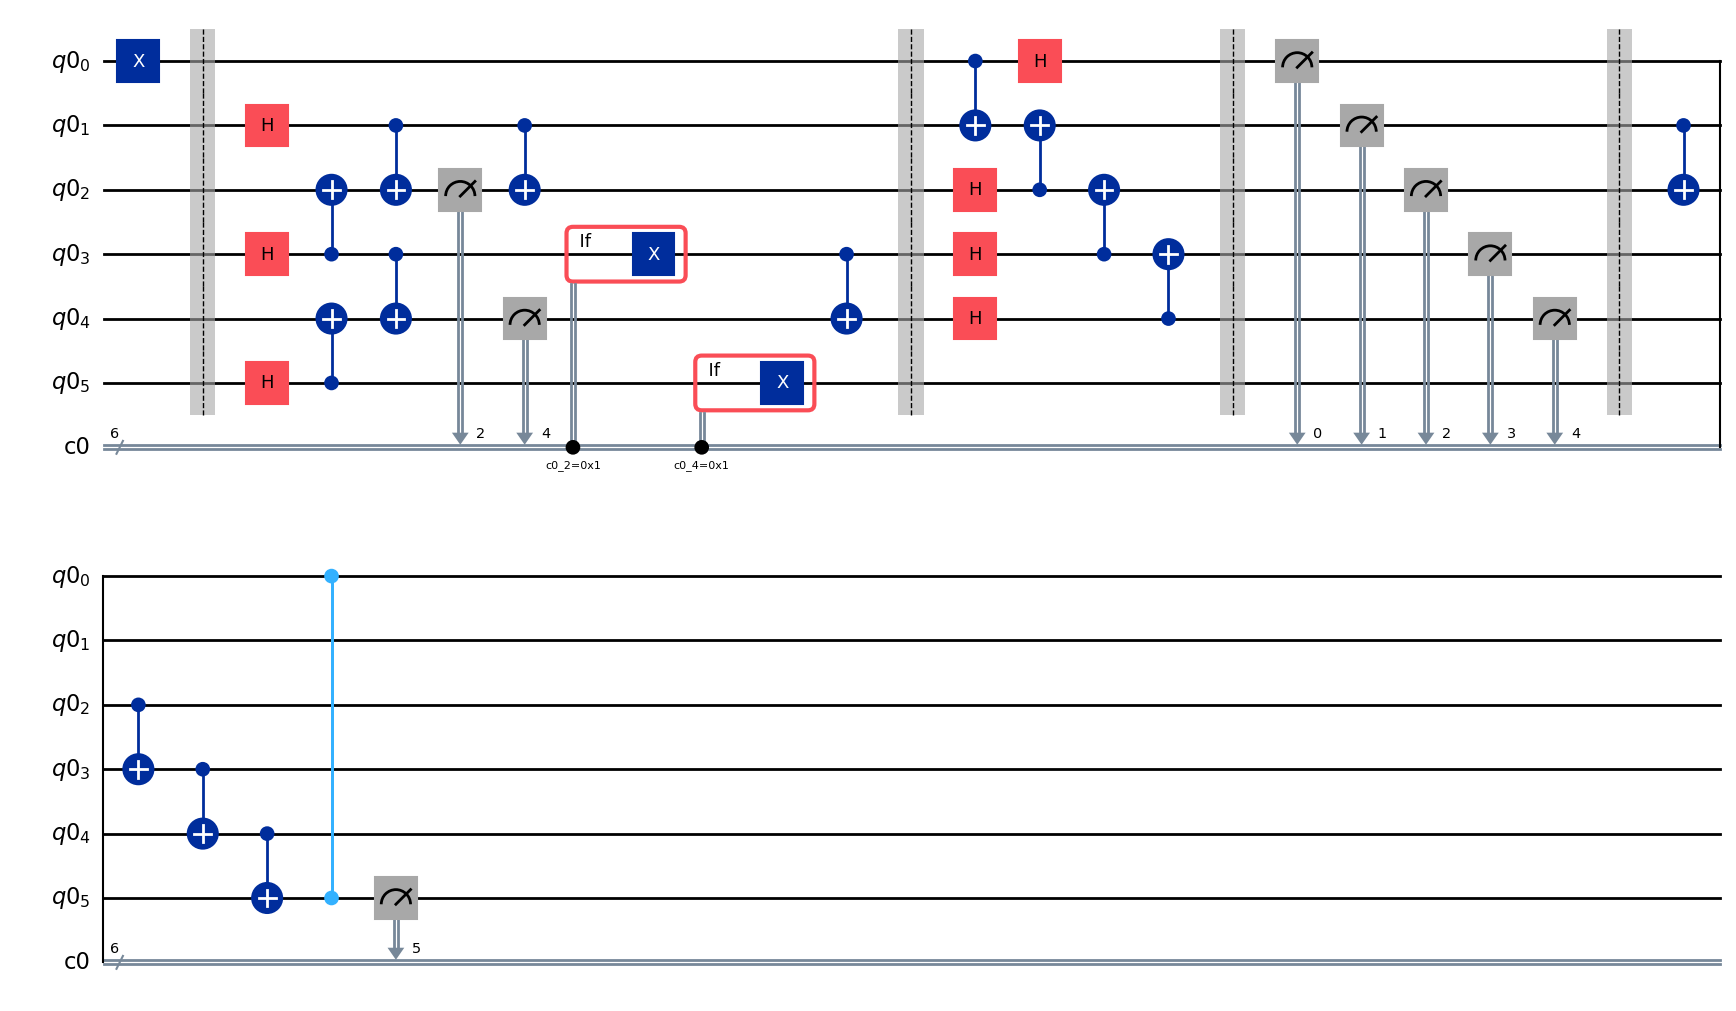

In [3]:
circuit.cx(q0,q1)
circuit.h([q0, q2, q3, q4])
circuit.cx(q2,q1)
circuit.cx(q3,q2)
circuit.cx(q4,q3)
circuit.barrier()
circuit.measure([q0,q1,q2,q3,q4],[c0,c1,c2,c3,c4])
circuit.barrier()
circuit.cx(q1,q2)
circuit.cx(q2,q3)
circuit.cx(q3,q4)
circuit.cx(q4,q5)
circuit.cz(q0,q5)
circuit.measure(q5,c5)
circuit.draw('mpl')

In [4]:
circuit.depth()

18

/Users/shisheerskaushik/anaconda3/envs/qiskit_1.0/lib/python3.10/site-packages/qiskit/visualization/circuit/circuit_visualization.py:611: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  qcimg = _latex.QCircuitImage(


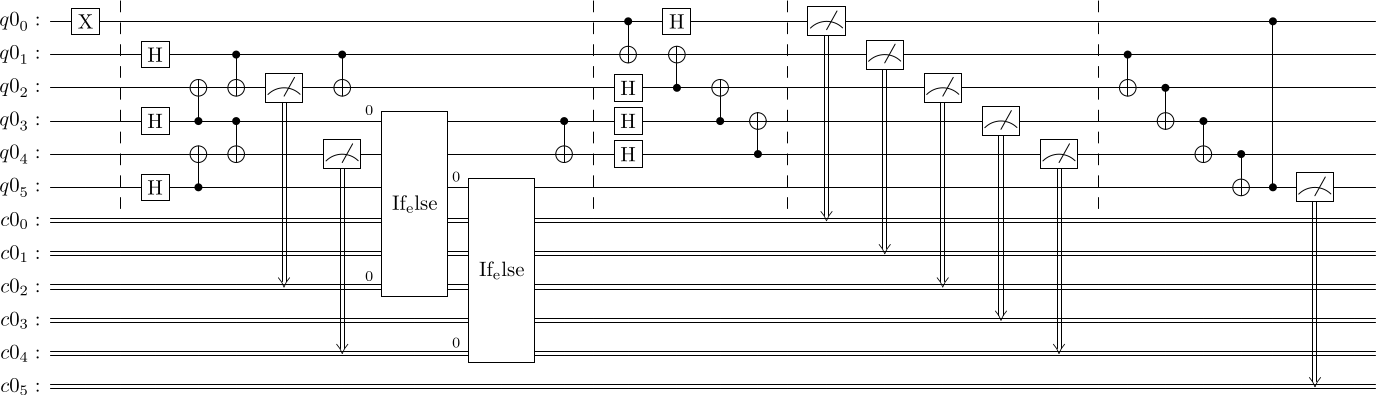

In [5]:
circuit.draw('latex')

In [6]:
from qiskit_ibm_runtime import (
    QiskitRuntimeService, Estimator, Options
)
service = QiskitRuntimeService()
options = Options()
options.resilience_level = 3
options.optimization_level = 2
options.resilience.noise_factors = (1, 2, 3, 4)
options.resilience.extrapolator = 'QuadraticExtrapolator'
backend = service.least_busy(operational=True, simulator=False)
 
estimator = Estimator(options=options, backend=backend)
backend

<IBMBackend('ibm_kyoto')>

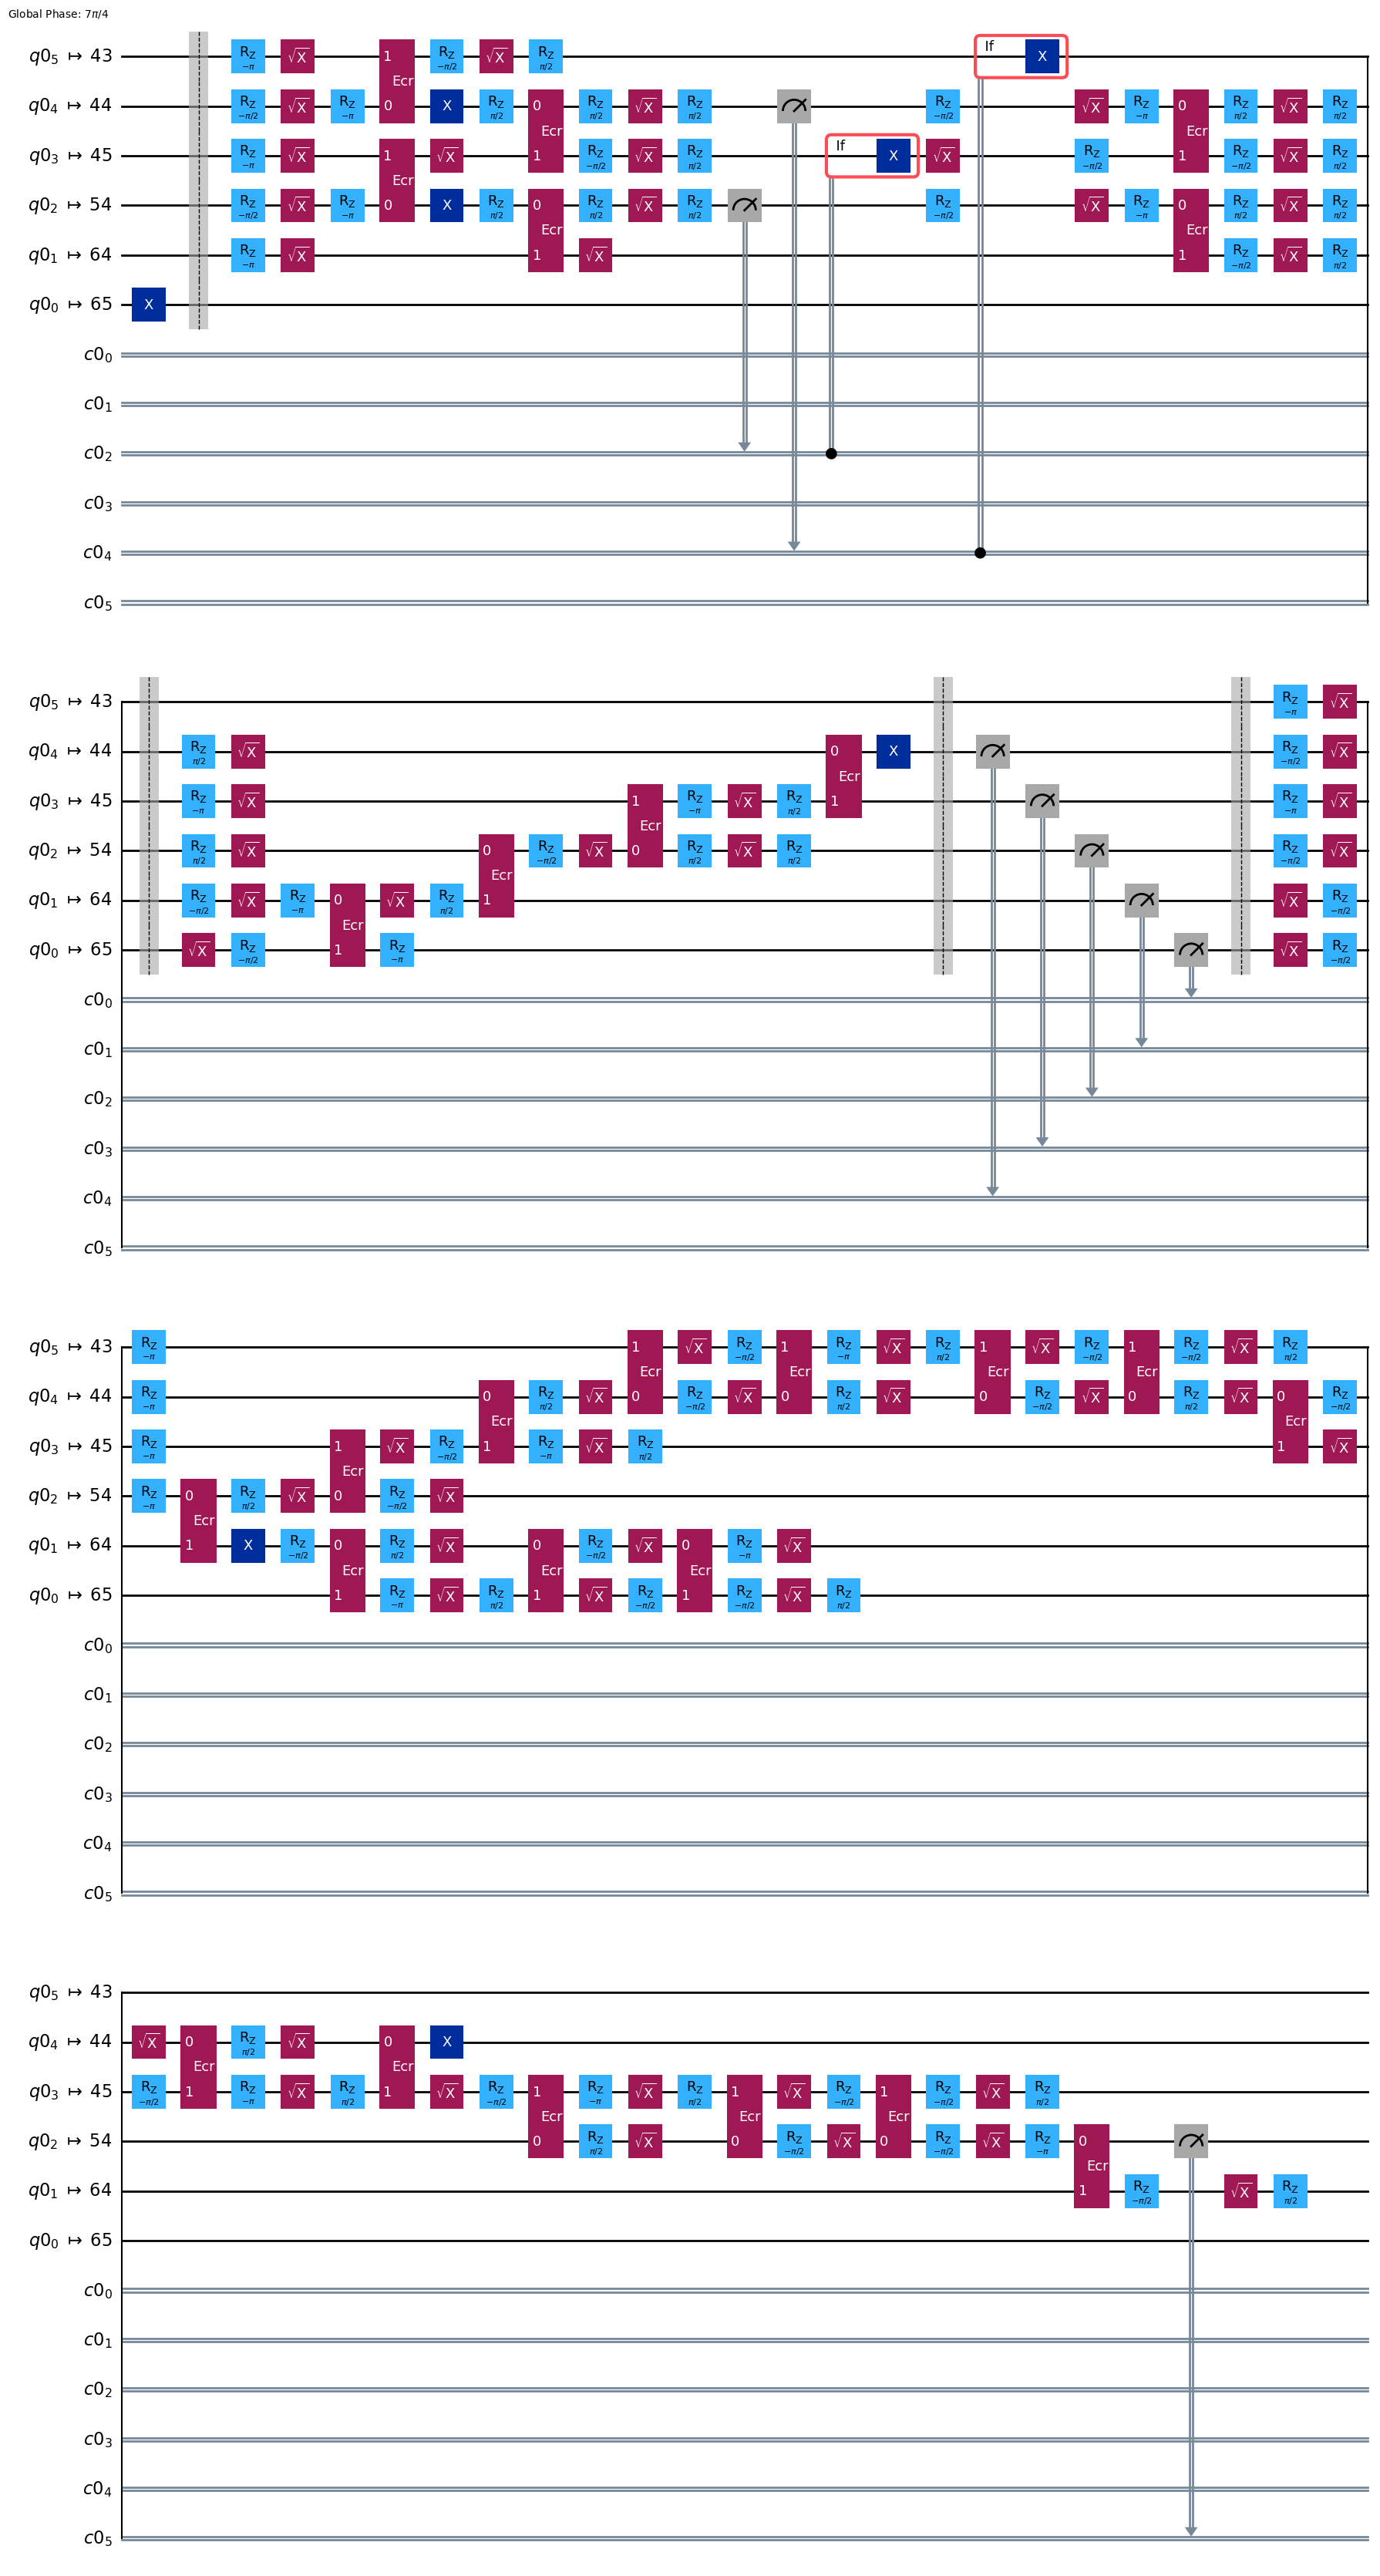

In [7]:
built = transpile(circuit, backend)
built.draw(output="mpl", style='iqp', idle_wires=False, cregbundle=False)

In [8]:
job = backend.run(built, dynamic=True)
hardware_counts = job.result().get_counts()

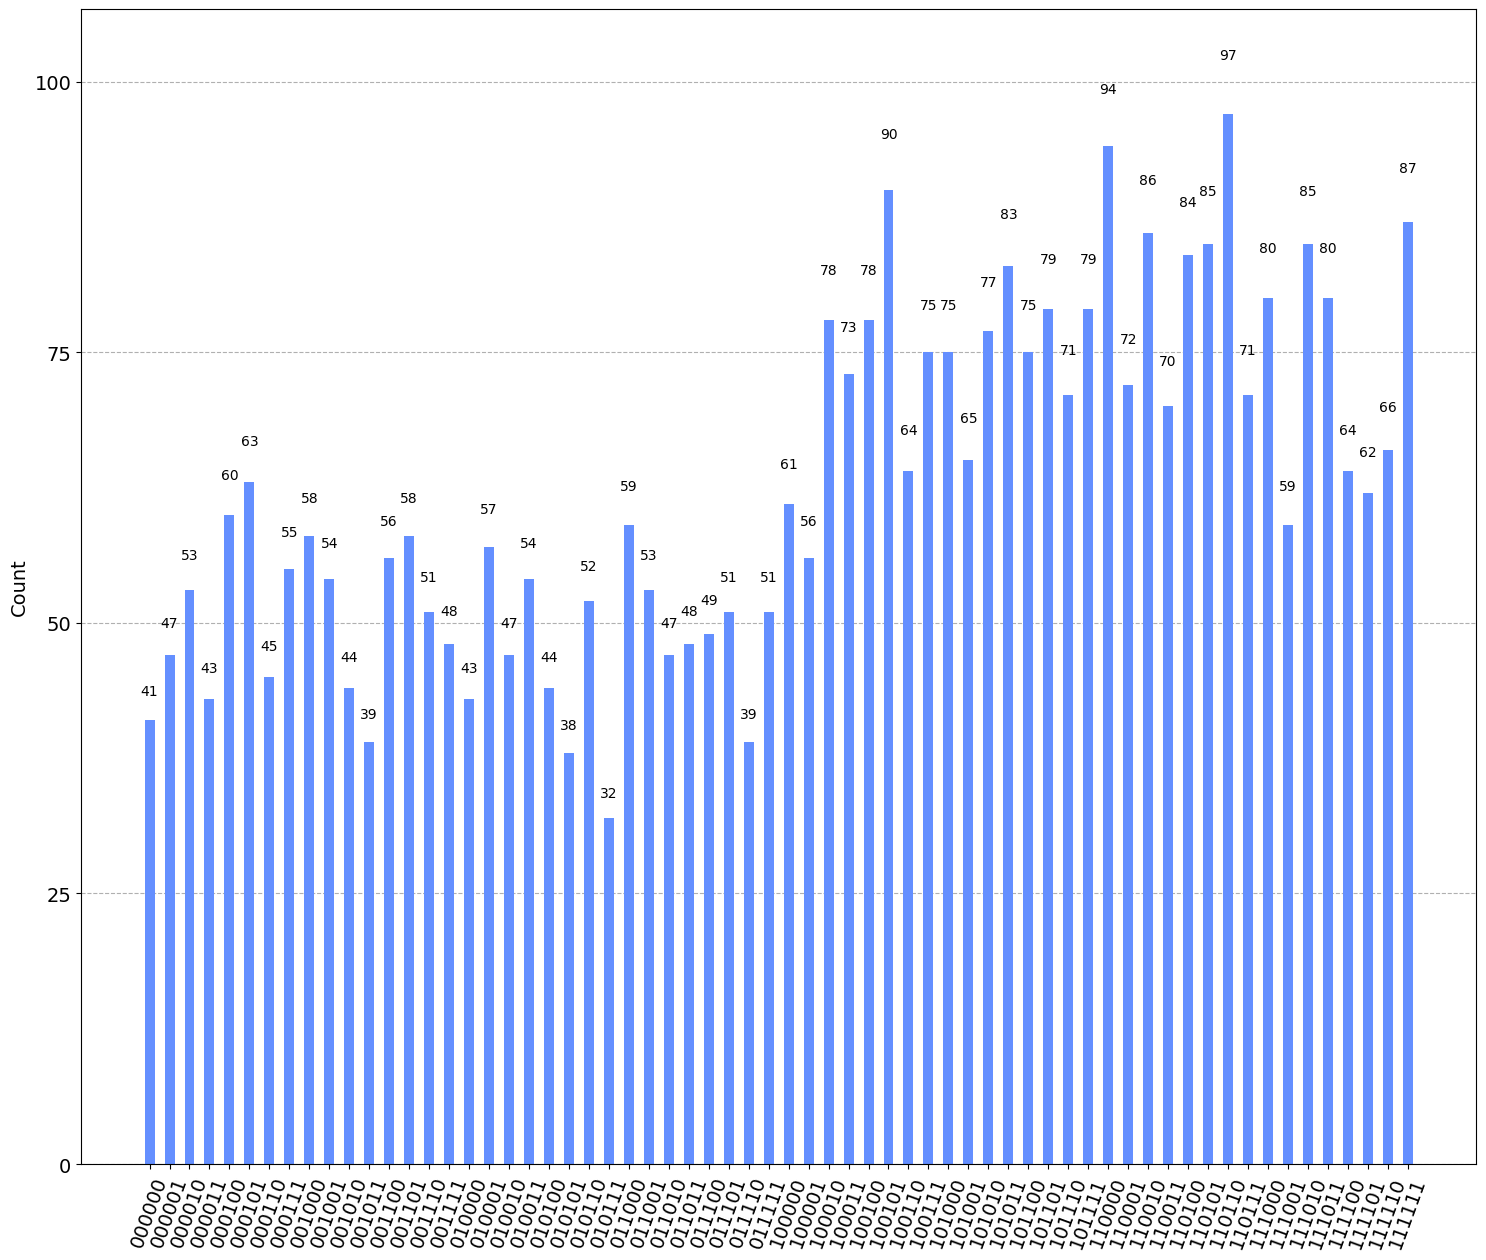

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(hardware_counts, figsize=(18,15))